In [2]:
import pandas_datareader as pdr
import matplotlib.pyplot as plt


pdr.famafrench.get_available_datasets()

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

In [3]:
start = "1926-01-01"

In [4]:
ff = pdr.famafrench.FamaFrenchReader('F-F_Research_Data_Factors',freq ="M", start= start).read()

In [5]:
ff

{0:          Mkt-RF   SMB   HML    RF
 Date                             
 1926-07    2.96 -2.56 -2.43  0.22
 1926-08    2.64 -1.17  3.82  0.25
 1926-09    0.36 -1.40  0.13  0.23
 1926-10   -3.24 -0.09  0.70  0.32
 1926-11    2.53 -0.10 -0.51  0.31
 ...         ...   ...   ...   ...
 2022-07    9.57  2.81 -4.10  0.08
 2022-08   -3.77  1.39  0.31  0.19
 2022-09   -9.35 -0.82  0.03  0.19
 2022-10    7.83  0.10  8.05  0.23
 2022-11    4.60 -3.40  1.39  0.29
 
 [1157 rows x 4 columns],
 1:       Mkt-RF    SMB    HML    RF
 Date                            
 1927   29.47  -2.04  -4.54  3.12
 1928   35.39   4.51  -6.17  3.56
 1929  -19.54 -30.70  11.67  4.75
 1930  -31.23  -5.17 -11.54  2.41
 1931  -45.11   3.70 -13.95  1.07
 ...      ...    ...    ...   ...
 2017   21.51  -4.97 -13.51  0.80
 2018   -6.95  -3.21  -9.73  1.83
 2019   28.28  -6.10 -10.34  2.15
 2020   23.66  13.17 -46.57  0.45
 2021   23.56  -3.92  25.57  0.04
 
 [95 rows x 4 columns],
 'DESCR': 'F-F Research Data Factors\n-----

In [6]:
ff_df = ff[0]

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

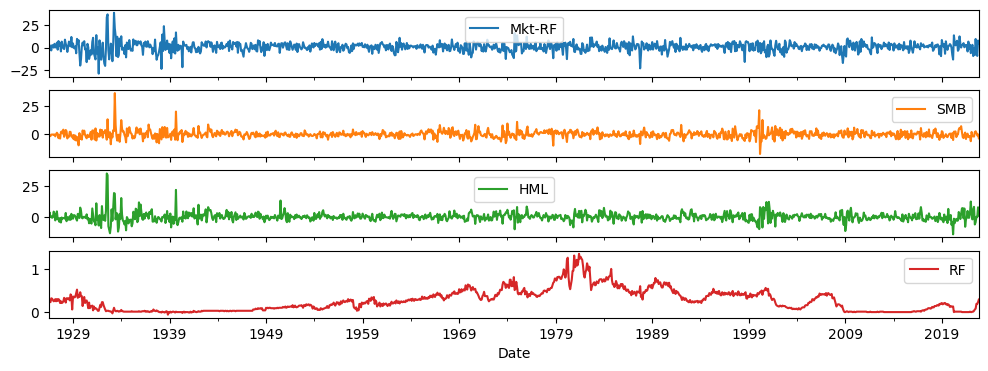

In [8]:

ff_df.plot(subplots=True, figsize=(12,4))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

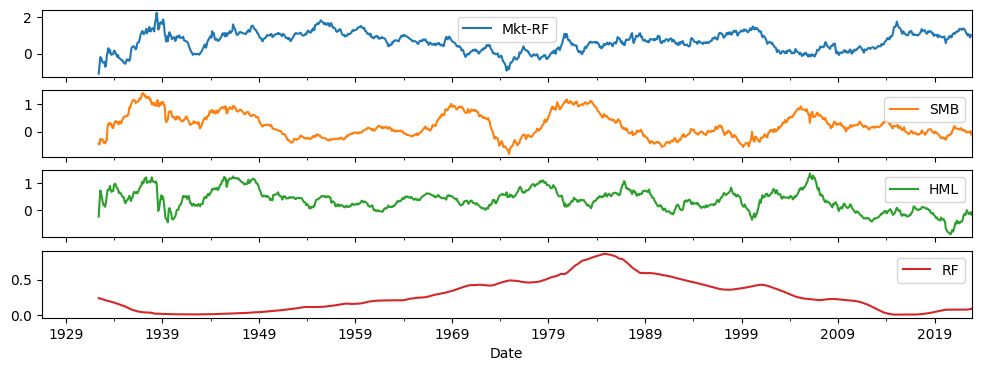

In [9]:
#72 months
ff_df.rolling(72).mean().plot(subplots=True, figsize=(12,4) )

In [10]:
ff_df


,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31
...,...,...,...,...
2022-07,9.57,2.81,-4.10,0.08
2022-08,-3.77,1.39,0.31,0.19
2022-09,-9.35,-0.82,0.03,0.19


array([<AxesSubplot:xlabel='Date'>], dtype=object)

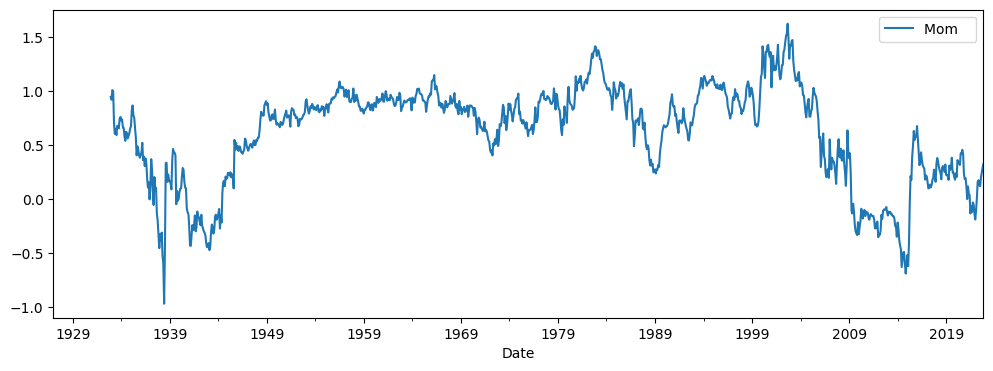

In [13]:
ff_mom_df = pdr.famafrench.FamaFrenchReader('F-F_Momentum_Factor',freq ="M", start= start).read()[0]
ff_mom_df.rolling(72).mean().plot(subplots=True, figsize=(12,4))

In [14]:
ff_mom_df

,Mom
Date,
1927-01,0.36
1927-02,-2.14
1927-03,3.61
1927-04,4.30
1927-05,3.00
...,...
2022-07,-3.96
2022-08,2.10
2022-09,3.48


In [17]:
import pandas as pd
ffac_merged_df = pd.merge(ff_df, ff_mom_df, on='Date' , how='inner', sort=True, copy=True, indicator=False, validate="one_to_one")

In [18]:

ffac_merged_df

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
1927-01,-0.06,-0.37,4.54,0.25,0.36
1927-02,4.18,0.04,2.94,0.26,-2.14
1927-03,0.13,-1.65,-2.61,0.30,3.61
1927-04,0.46,0.30,0.81,0.25,4.30
1927-05,5.44,1.53,4.73,0.30,3.00
...,...,...,...,...,...
2022-07,9.57,2.81,-4.10,0.08,-3.96
2022-08,-3.77,1.39,0.31,0.19,2.10
2022-09,-9.35,-0.82,0.03,0.19,3.48


In [7]:
import yfinance as yf
yf.pdr_override()
import pandas_datareader as pdr

start = "1926-01-01"

apple_df = pdr.data.get_data_yahoo("AAPL", start = start)['Adj Close'].resample("M").ffill().pct_change()

[*********************100%***********************]  1 of 1 completed


In [8]:

apple_df

Date
1980-12-31 00:00:00-05:00         NaN
1981-01-31 00:00:00-05:00   -0.172163
1981-02-28 00:00:00-05:00   -0.061943
1981-03-31 00:00:00-05:00   -0.075475
1981-04-30 00:00:00-04:00    0.158163
                               ...   
2022-09-30 00:00:00-04:00   -0.120977
2022-10-31 00:00:00-04:00    0.109551
2022-11-30 00:00:00-05:00   -0.033027
2022-12-31 00:00:00-05:00   -0.122273
2023-01-31 00:00:00-05:00    0.074540
Freq: M, Name: Adj Close, Length: 506, dtype: float64

In [10]:
apple_df.to_frame()

,Adj Close
Date,
1980-12-31 00:00:00-05:00,NaN
1981-01-31 00:00:00-05:00,-0.172163
1981-02-28 00:00:00-05:00,-0.061943
1981-03-31 00:00:00-05:00,-0.075475
1981-04-30 00:00:00-04:00,0.158163
...,...
2022-09-30 00:00:00-04:00,-0.120977
2022-10-31 00:00:00-04:00,0.109551
2022-11-30 00:00:00-05:00,-0.033027
